In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle

In [2]:
df_purchase=pd.read_csv(r'C:\Users\admin\Desktop\purchase%20data.csv')
df_purchase

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,1,0,0,0,0,42,1,120946,1,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,0,42,1,120946,1,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,0,42,1,120946,1,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,0,42,1,120946,1,0


In [3]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58693 entries, 0 to 58692
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58693 non-null  int64  
 1   Day                58693 non-null  int64  
 2   Incidence          58693 non-null  int64  
 3   Brand              58693 non-null  int64  
 4   Quantity           58693 non-null  int64  
 5   Last_Inc_Brand     58693 non-null  int64  
 6   Last_Inc_Quantity  58693 non-null  int64  
 7   Price_1            58693 non-null  float64
 8   Price_2            58693 non-null  float64
 9   Price_3            58693 non-null  float64
 10  Price_4            58693 non-null  float64
 11  Price_5            58693 non-null  float64
 12  Promotion_1        58693 non-null  int64  
 13  Promotion_2        58693 non-null  int64  
 14  Promotion_3        58693 non-null  int64  
 15  Promotion_4        58693 non-null  int64  
 16  Promotion_5        586

In [4]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

# Import Segmentation Model

In [5]:
scaler=pickle.load(open('scaler.pickle','rb'))

In [6]:
pca=pickle.load(open('pca.pickle','rb'))

In [7]:
kmeans_pca=pickle.load(open('kmeans_pca.pickle','rb'))

In [8]:
features=df_purchase[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
df_purchase_segm_std=scaler.transform(features)

# PCA

In [9]:
df_purchase_segm_pca=pca.transform(df_purchase_segm_std)

# K-Means PCA

In [10]:
purchase_segm_kmeans_pca=kmeans_pca.predict(df_purchase_segm_pca)

In [11]:
df_purchase_predictors=df_purchase.copy()

In [12]:
df_purchase_predictors['Segment']=purchase_segm_kmeans_pca

In [13]:
df_purchase_predictors

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,0,0,0,0,42,1,120946,1,0,1
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,42,1,120946,1,0,1
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,42,1,120946,1,0,1
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,42,1,120946,1,0,1


# Descriptive Analysis By Segments

# Data Analysis By Customer

In [14]:
temp1=df_purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index=False).count()
temp1=temp1.set_index(['ID'])
temp1=temp1.rename(columns={'Incidence':'N Visits'})
temp1

,N Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111
...,...
200000496,120
200000497,120
200000498,131


In [15]:
temp2=df_purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index=False).sum()
temp2=temp2.set_index("ID")
temp2=temp2.rename(columns={'Incidence':'N purchases'})
temp3=temp1.join(temp2)
temp3

,N Visits,N purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13
...,...,...
200000496,120,20
200000497,120,43
200000498,131,39


In [16]:
temp3['Average Number Of Purchases']=temp3['N purchases']/temp3['N Visits']
temp3

,N Visits,N purchases,Average Number Of Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117
...,...,...,...
200000496,120,20,0.166667
200000497,120,43,0.358333
200000498,131,39,0.297710


In [17]:
temp4=df_purchase_predictors[['ID','Segment']].groupby(['ID'],as_index=False).mean()
temp4=temp4.set_index("ID")
df_purchase_descr=temp3.join(temp4)

In [18]:
df_purchase_descr.head()

,N Visits,N purchases,Average Number Of Purchases,Segment
ID,,,,
200000001,101,9,0.089109,1
200000002,87,11,0.126437,0
200000003,97,10,0.103093,1
200000004,85,11,0.129412,1
200000005,111,13,0.117117,3


# Segment Proportions

In [23]:
segm_prop=df_purchase_descr[['N purchases','Segment']].groupby(['Segment']).count()/df_purchase_descr.shape[0]
segm_prop=segm_prop.rename(columns={'N purchases':'Segment Proportions'})

In [24]:
segm_prop

,Segment Proportions
Segment,
0,0.196
1,0.376
2,0.208
3,0.220


Text(0.5, 1.0, 'Segment Proportions')

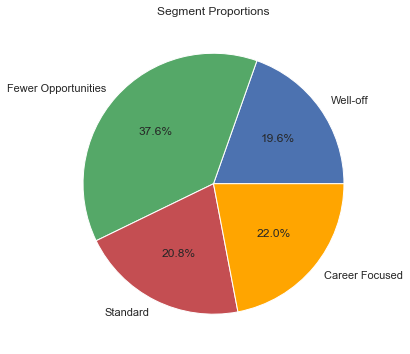

In [28]:
plt.figure(figsize=(9,6))
plt.pie(segm_prop['Segment Proportions'],
       labels=['Well-off','Fewer Opportunities','Standard','Career Focused'],
       autopct='%1.1f%%',
       colors=('b','g','r','orange'))
plt.title('Segment Proportions')

# Purchase Occasion and Purchase incidence

In [29]:
segments_mean=df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N Visits,N purchases,Average Number Of Purchases
Segment,,,
0,117.295918,34.602041,0.284478
1,113.835106,22.792553,0.201755
2,117.471154,24.817308,0.212364
3,123.454545,39.827273,0.283102


In [30]:
segments_std=df_purchase_descr.groupby(['Segment']).std()
segments_std

,N Visits,N purchases,Average Number Of Purchases
Segment,,,
0,20.716152,25.900579,0.171787
1,16.390601,13.843068,0.120634
2,19.088937,16.715648,0.126056
3,44.864656,53.744530,0.200056


Text(0.5, 1.0, 'Average Number Of Store Visit By Segment')

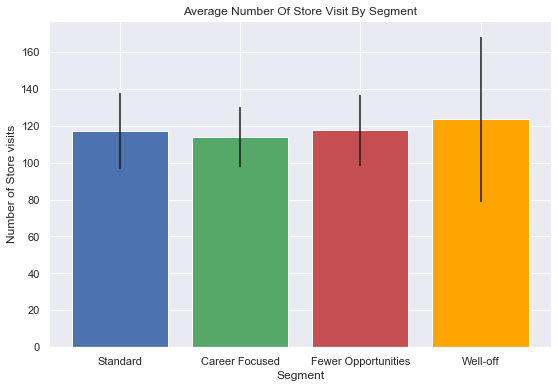

In [33]:
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3),
       tick_label=('Standard','Career Focused','Fewer Opportunities','Well-off'),
       height=segments_mean['N Visits'],
       yerr=segments_std['N Visits'],
       color=('b','g','r','orange'))

plt.xlabel('Segment')
plt.ylabel('Number of Store visits')
plt.title('Average Number Of Store Visit By Segment')

Text(0.5, 1.0, 'Number Of Purchases By Segment')

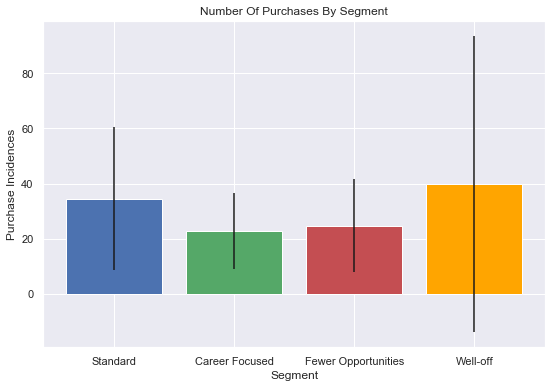

In [35]:
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3),
       tick_label=('Standard','Career Focused','Fewer Opportunities','Well-off'),
       height=segments_mean['N purchases'],
       yerr=segments_std['N purchases'],
       color=('b','g','r','orange'))

plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Number Of Purchases By Segment')

Text(0.5, 1.0, 'Average Number Of Purchases By Segment')

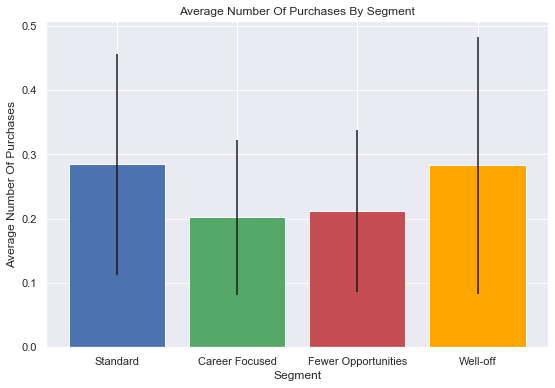

In [36]:
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3),
       tick_label=('Standard','Career Focused','Fewer Opportunities','Well-off'),
       height=segments_mean['Average Number Of Purchases'],
       yerr=segments_std['Average Number Of Purchases'],
       color=('b','g','r','orange'))

plt.xlabel('Segment')
plt.ylabel('Average Number Of Purchases')
plt.title('Average Number Of Purchases By Segment')

# Brand Choice

In [38]:
df_purchase_incidence=df_purchase_predictors[df_purchase_predictors['Incidence']==1]

In [39]:
brand_dummies=pd.get_dummies(df_purchase_incidence['Brand'],prefix='Brand',prefix_sep='_')
brand_dummies['Segmnet'],brand_dummies['ID']=df_purchase_incidence['Segment'],df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segmnet,ID
6,0,1,0,0,0,1,200000001
11,0,0,0,0,1,1,200000001
19,1,0,0,0,0,1,200000001
24,0,0,0,1,0,1,200000001
29,0,1,0,0,0,1,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,1,200000500
58648,1,0,0,0,0,1,200000500
58674,0,1,0,0,0,1,200000500
58687,0,1,0,0,0,1,200000500


In [40]:
temp=brand_dummies.groupby(['ID'],as_index=True).mean()

In [43]:
temp.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segmnet
ID,,,,,,
200000001,0.111111,0.444444,0.0,0.222222,0.222222,1
200000002,0.000000,0.090909,0.0,0.909091,0.000000,0
200000003,0.000000,0.800000,0.0,0.000000,0.200000,1
200000004,0.000000,0.090909,0.0,0.000000,0.909091,1
200000005,0.000000,0.000000,0.0,0.000000,1.000000,3


In [44]:
mean_brand_choice=temp.groupby(['Segmnet'],as_index=True).mean()

Text(0.5, 1, 'Average Brand Choice By Segment')

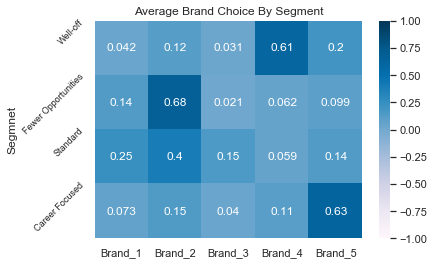

In [46]:
sns.heatmap(mean_brand_choice,
           vmin=-1,
           vmax=1,
           cmap='PuBu',
           annot=True)

plt.yticks([0,1,2,3],['Well-off','Fewer Opportunities','Standard','Career Focused'],rotation=45,fontsize=9)
plt.title('Average Brand Choice By Segment')

# Revenue

In [48]:
temp=df_purchase_predictors[df_purchase_predictors['Brand']==1]
temp.loc[:,'Revenue Brand 1']=temp['Price_1']*temp['Quantity']
segment_brand_revenue=pd.DataFrame()
segment_brand_revenue[['Segment','Revenue Brand 1']]=temp[['Segment','Revenue Brand 1']].groupby('Segment',as_index=False).sum()
segment_brand_revenue

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Segment,Revenue Brand 1
0,0,699.47
1,1,2258.90
2,2,2611.19
3,3,736.09


In [49]:
temp=df_purchase_predictors[df_purchase_predictors['Brand']==2]
temp.loc[:,'Revenue Brand 2']=temp['Price_2']*temp['Quantity']
segment_brand_revenue[['Segment','Revenue Brand 2']]=temp[['Segment','Revenue Brand 2']].groupby('Segment',as_index=False).sum()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [50]:
temp=df_purchase_predictors[df_purchase_predictors['Brand']==3]
temp.loc[:,'Revenue Brand 3']=temp['Price_3']*temp['Quantity']
segment_brand_revenue[['Segment','Revenue Brand 3']]=temp[['Segment','Revenue Brand 3']].groupby('Segment',as_index=False).sum()

In [51]:
temp=df_purchase_predictors[df_purchase_predictors['Brand']==4]
temp.loc[:,'Revenue Brand 4']=temp['Price_4']*temp['Quantity']
segment_brand_revenue[['Segment','Revenue Brand 4']]=temp[['Segment','Revenue Brand 4']].groupby('Segment',as_index=False).sum()

In [52]:
temp=df_purchase_predictors[df_purchase_predictors['Brand']==5]
temp.loc[:,'Revenue Brand 5']=temp['Price_5']*temp['Quantity']
segment_brand_revenue[['Segment','Revenue Brand 5']]=temp[['Segment','Revenue Brand 5']].groupby('Segment',as_index=False).sum()

In [53]:
segment_brand_revenue['Total Revenue']=(segment_brand_revenue['Revenue Brand 1']+
                                       segment_brand_revenue['Revenue Brand 2']+
                                       segment_brand_revenue['Revenue Brand 3']+
                                       segment_brand_revenue['Revenue Brand 4']+
                                       segment_brand_revenue['Revenue Brand 5'])

segment_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,699.47,1298.23,731.35,14185.57,5509.69,22424.31
1,1,2258.90,13868.30,716.25,1629.31,2230.50,20703.26
2,2,2611.19,4855.36,3909.17,861.38,2439.75,14676.85
3,3,736.09,1746.42,664.75,2363.84,19441.06,24952.16


In [54]:
segment_brand_revenue['Segment Proportions']=segm_prop['Segment Proportions']
segment_brand_revenue['Segment']=segment_brand_revenue['Segment'].map({0:'Well-Off',
                                                                      1:'Fewer-Opportunities',
                                                                      2:'Standard',
                                                                      3:'Career-Focused'})
segment_brand_revenuem=segment_brand_revenue.set_index(['Segment'])
segment_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
0,Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
1,Fewer-Opportunities,2258.90,13868.30,716.25,1629.31,2230.50,20703.26,0.376
2,Standard,2611.19,4855.36,3909.17,861.38,2439.75,14676.85,0.208
3,Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
